# Contents

## Import Libraries and Data

In [1]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
import json

In [2]:
# Set Path
path = r'C:\Users\bwink\Downloads\Data Analytics A6'

In [3]:
# Import Data Set
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'crop_yield.csv'))

In [4]:
# Describe Data Set
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [6]:
df.shape

(19689, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
# Check for null values
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

## Checking Column value_counts

In [9]:
df['State'].value_counts(dropna = False)

Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: State, dtype: int64

In [10]:
df['Season'].value_counts(dropna = False)

Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: Season, dtype: int64

In [11]:
df['Crop_Year'].value_counts(dropna = False)

2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: Crop_Year, dtype: int64

In [12]:
df['Annual_Rainfall'].value_counts(dropna = False)

1434.5875    360
1317.2000     93
687.6000      91
1201.9000     83
1207.0000     74
            ... 
3680.3000      7
1398.5000      5
3252.4000      5
1498.0000      5
1356.2000      3
Name: Annual_Rainfall, Length: 634, dtype: int64

In [13]:
df['Crop'].value_counts(dropna = False)

Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garlic    

In [14]:
#check for duplicates
df_dups = df[df.duplicated()]

In [15]:
df_dups

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield


## No Duplicates Found

In [16]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


## Correlation Heatmap

In [4]:
# Create subset
sub = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']]

In [39]:
sub.corr()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Area,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


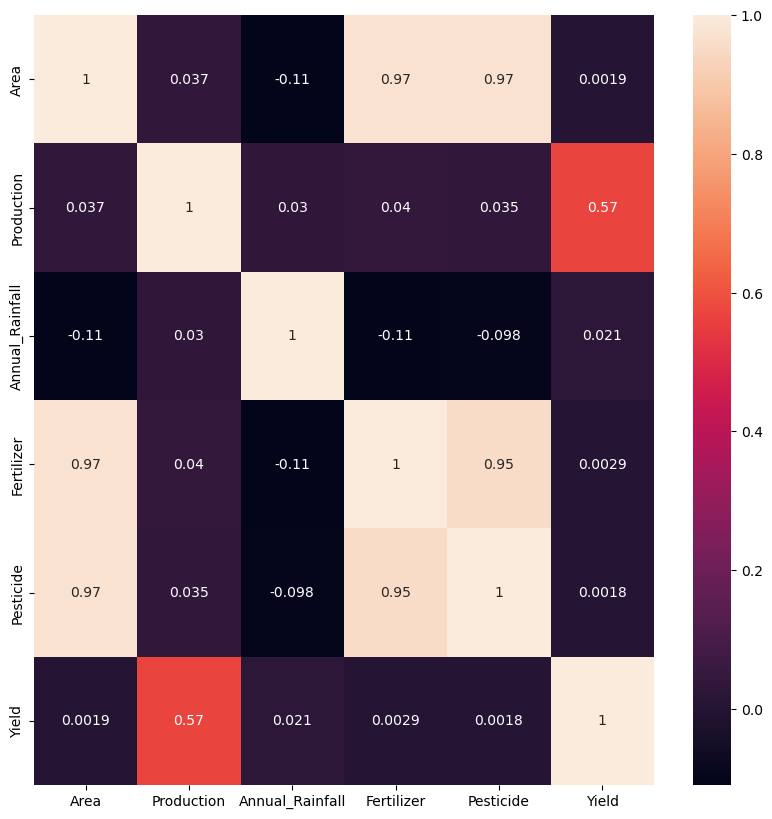

In [40]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
plt.savefig("Heat_map.png")

In [31]:
cwd = os.getcwd()
cwd

'C:\\Users\\bwink\\Downloads\\Data Analytics A6\\Scripts'

## Notes on Heatmap

In [ ]:
#Annual Rainfall Correlations
# Yield (.021)
# Production (.03)
# Fertilizer (-.011)
# Pesticide (-.098)
# Annual Rainfall has slight negative correlations with Fertilizer and Pesticide, while having slight positive correlations
# with Production and Yield

# Pesticide Correlation
# Yield (.0018)
# Production ( .035)
# Area (.97)
# Fertilizer (.95)
# Pesticide has a strong positive correlation with Area used and amount of Fertilizer used, and a slight positive correlation
# with Production and Yield

# Fertilizer Correlation
# Yield (.0029)
# Production (.04)
# Area (.97)
# Fertilizer amount has weak positive correlation to Yield and Production, while having a very strong positive correlation 
# with Area

# Scatterplots

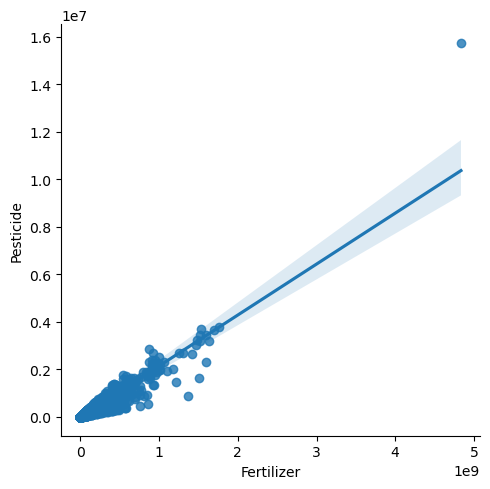

In [43]:
# Scatterplot for Fertilizer and Pesticide
scatter_FP = sns.lmplot(x = 'Fertilizer', y = 'Pesticide', data = df)
plt.savefig('Scatter_fp.png')

## Very strong correlation between Fertilizer and Pesticide, there appears to be an outlier that should be investigated

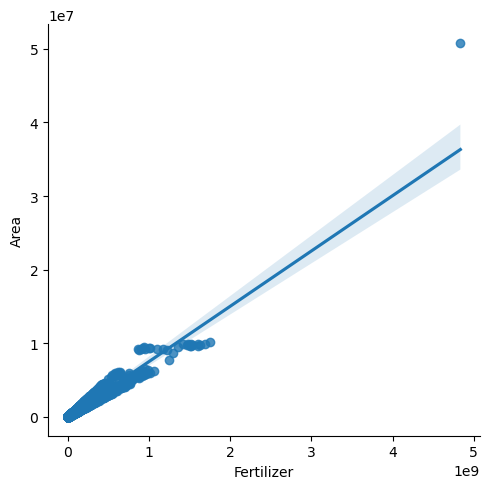

In [47]:
# Scatterplot for Fertilizer and Area
scatter_FA = sns.lmplot(x = 'Fertilizer', y = 'Area', data = df)
plt.savefig('scatter_fa.png')


## Very strong, positive correlation

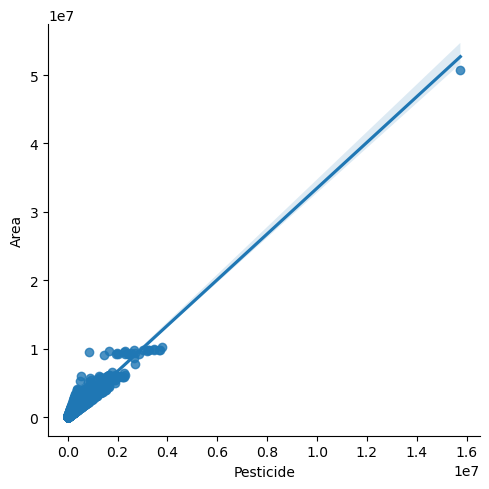

In [48]:
# Scatterplot for Pesticide and Area
scatter_PA = sns.lmplot(x = 'Pesticide', y = 'Area', data = df)
plt.savefig('scatter_pa.png')

## Very strong, positive correlation

# Pair Plot

In [ ]:
# Create Pair Plot
pairplot_1 = sns.pairplot(sub)
plt.savefig('pairplot_1.png')

## pairplot created, saved, won't load in. Will include in a Word Doc

In [ ]:
# The correlation between Production and Yield is moderate in strength and shows some interesting behavior. 
# It would be worthwhile to investigate this correlation through the lens of crop type, area, and season
# It could be the case that some crop types simply have lower yield while still having high production

## Categorical Plot

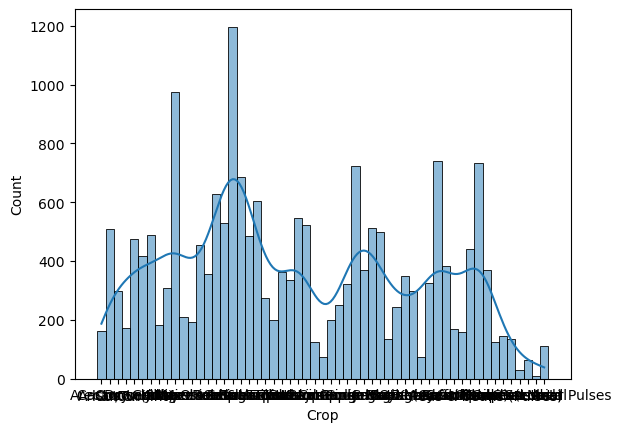

In [58]:
sns.histplot(df['Crop'], bins = 20, kde = True)
# categorical plot by Crop name
# Should categorize into new crop_type column to make visualization less cluttered
plt.savefig('crop_catplot.png')

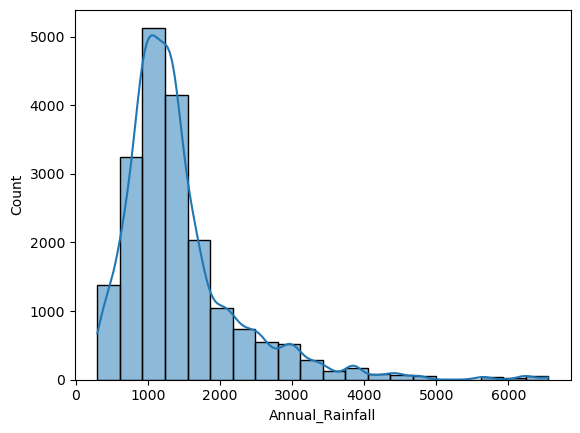

In [64]:
# categorical plot by Annual_Rainfall
sns.histplot(df['Annual_Rainfall'], bins = 20, kde = True)
plt.savefig('rainfall_catplot.png')

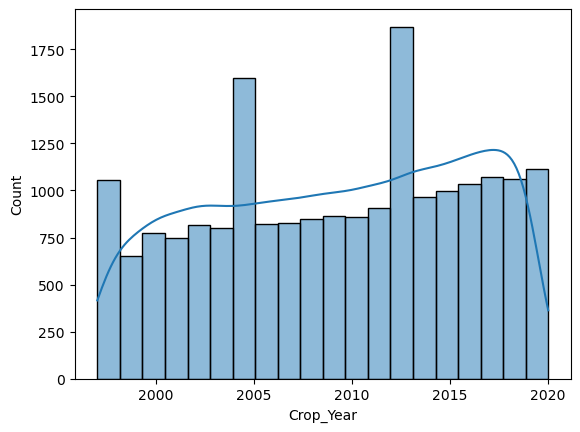

In [61]:
# categorical plot by Crop_Year
sns.histplot(df['Crop_Year'], bins = 20, kde = True)
plt.savefig('cropyear_catplot.png')

In [62]:
# Some years have more entries than others

## We can see that there are clear favorites for what crops are grown

## Questions

In [59]:
# There is a slight negative correlation between Annual_Rainfall and Fertilizer/Pesticide
# Annual_Rainfall has a slight positive correlation with Production, Yield

## Hypotheses

In [65]:
# Certain crop types have greater yield
# Certain crop types have greater production
# Certain crop types require more fertilizer
# The yield of certain crops is more affected by annual_rainfall than others
# Annual_Rainfall has a greater impact on the production and yield of certain crop types over others

# Map